In [42]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import random
import _thread as thread
from tensorflow.keras import layers
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt 
import shutil
import splitfolders

In [2]:
# directory utility
def make_new_dir(dirname):
  labels = os.listdir('Original Dataset')
  if not os.path.exists(dirname):
    os.makedirs(dirname)

  for label in labels:
    path = dirname+'/'+label
    if not os.path.exists(path):
      os.makedirs(path)

In [3]:
explor_data = []
labels = []
main_path = 'Original Dataset'
for label in os.listdir(main_path): #loop masing masing class
  path = main_path+'/'+label
  img_paths = os.listdir(path)
  random.shuffle(img_paths)
  img_path = path+'/'+img_paths[0]
  img = plt.imread(img_path) #load image
  explor_data.append(img) #masukan citra kedalam list
  labels.append(label) #masukan encoded label kedalam list


In [4]:
len(os.listdir(main_path))

20

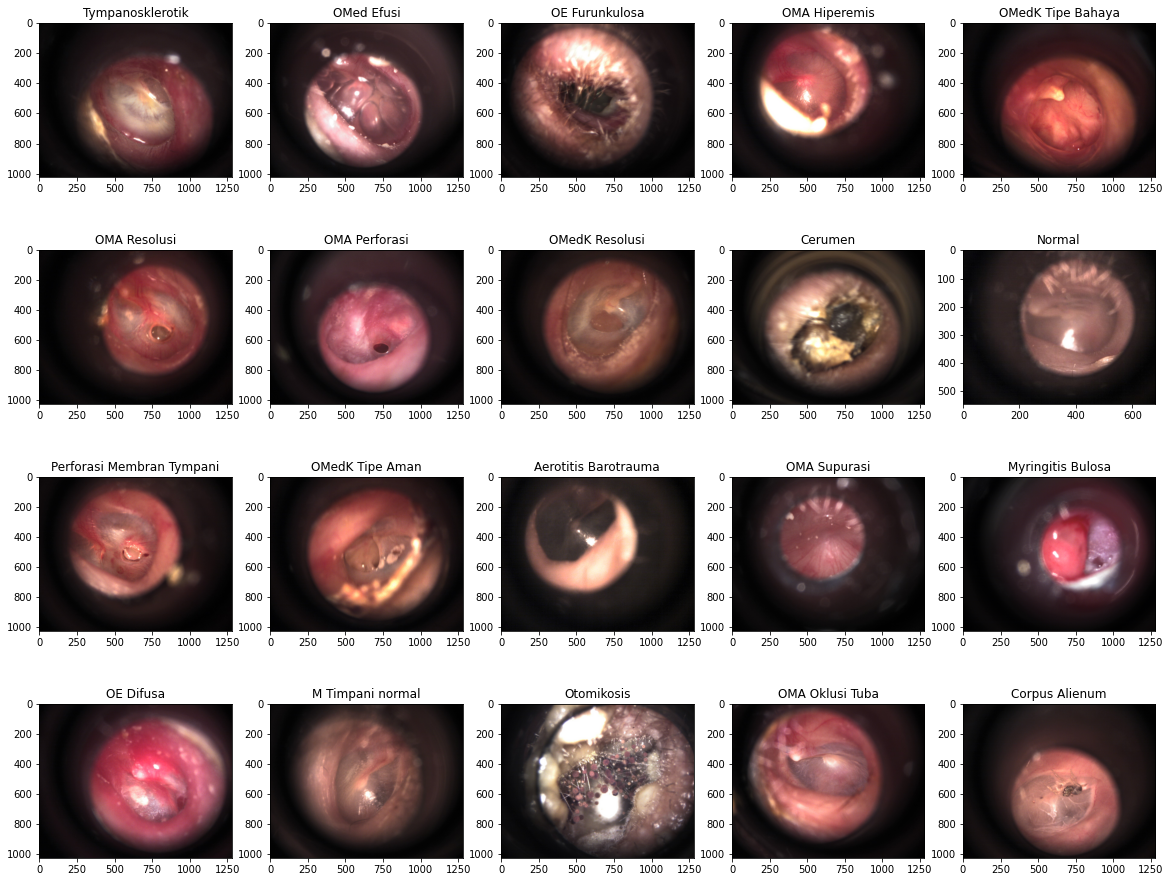

In [5]:
plt.figure(figsize=(20,16))
for i in range(20):
  plt.subplot(4,5,i+1)
  plt.title(labels[i])
  plt.imshow( explor_data[i] )

In [20]:
# preprocess all data
# one label perthread

def crop_resize(label, filename):
  try:
    img_filepath = 'Original Dataset/'+label+'/'+filename
    img = plt.imread(img_filepath)
    w, h = img.shape[:2]
    if w > h:
      img = img[(w-h)//2:w-(w-h)//2, :, :]
    elif h > w:
      img = img[:, (h-w)//2:h-(h-w)//2, :]
    img = cv2.resize(img, (224, 224), interpolation=cv2.INTER_CUBIC)
    plt.imsave('crop_resized/'+label+'/'+filename, img)
  except:
    print('error in '+img_filepath)


def perlabel_preprocess(label):
  print('Processing '+label+' thread started')
  path = 'Original Dataset/'+label
  img_paths = os.listdir(path)
  for img_path in img_paths:
    crop_resize(label, img_path)


In [22]:
make_new_dir('crop_resized')

In [23]:
# multithreading utility
def run_thread_perlabel():
  for label in os.listdir(main_path):
    thread.start_new_thread(perlabel_preprocess, (label,))

In [24]:
run_thread_perlabel()

Processing Tympanosklerotik thread started
Processing OE Furunkulosa thread started
Processing OMedK Tipe Bahaya thread started
Processing OMA Resolusi thread started
Processing OMA Perforasi thread started
Processing Normal thread started
Processing OMedK Tipe Aman thread started
Processing Perforasi Membran Tympani thread started
Processing OMA Supurasi thread started
Processing OMedK Resolusi thread started
Processing OE Difusa thread started
Processing M Timpani normal thread started
Processing Cerumen thread started
Processing Corpus Alienum thread started
Processing Myringitis Bulosa thread started
Processing Aerotitis Barotrauma thread started
Processing Otomikosis thread started
Processing OMA Oklusi Tuba thread started
Processing OMed Efusi thread started
Processing OMA Hiperemis thread started
error in Original Dataset/Tympanosklerotik/2016-10-26T19-33-36.png
error in Original Dataset/Otomikosis/2016-10-26T18-51-31.png
error in Original Dataset/OMA Perforasi/2018-05-08T19-58-

In [7]:
# show number of data perlabel, 
# to determine if the data is balanced or not 
# if the data is not balanced, we can use the data augmentation technique will be used to balance the data
label_metadata = {}
for label in os.listdir('crop_resized'):
  print(label+': '+str(len(os.listdir('crop_resized/'+label))))
  label_metadata[label] = len(os.listdir('crop_resized/'+label))

Tympanosklerotik: 49
OMed Efusi: 26
OE Furunkulosa: 14
OMA Hiperemis: 79
OMedK Tipe Bahaya: 94
OMA Resolusi: 12
OMA Perforasi: 43
OMedK Resolusi: 23
Cerumen: 55
Normal: 131
Perforasi Membran Tympani: 10
OMedK Tipe Aman: 130
Aerotitis Barotrauma: 10
OMA Supurasi: 55
Myringitis Bulosa: 8
OE Difusa: 90
M Timpani normal: 161
Otomikosis: 29
OMA Oklusi Tuba: 58
Corpus Alienum: 6


In [10]:
make_new_dir('augmented')

In [8]:

# data augmentation
def data_augmentation(label, multiplier):
  print('Processing '+label+' thread started')
  data_aug = tf.keras.Sequential([
      layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
      layers.experimental.preprocessing.RandomRotation(0.2),
  ])
  # add image to batch
  images = []
  filenames = []
  for filename in os.listdir('crop_resized/'+label):
    image = plt.imread('crop_resized/'+label+'/'+filename)
    filenames.append(filename)
    shutil.copy('crop_resized/'+label+'/'+filename,
                'augmented/'+label+'/'+filename)
    images.append(image)

  images = np.array(images)

  for i in range(multiplier):
    aug_images = data_aug(images)
    for j in range(len(aug_images)):
      tf.keras.utils.save_img('augmented/'+label+'/'+str(i)+'_'+ filenames[j], aug_images[j])
  # plt.subplot(3,3,i+1)
  # plt.imshow(aug_image[0])
  # plt.axis('off')


In [11]:
# target dataset minimal 200 label/class
keys = label_metadata.keys()

for label in keys:
  multiplier = 200//label_metadata[label] + 1
  print (label+': '+str(multiplier))
  thread.start_new_thread(
      data_augmentation, (label, multiplier))


Tympanosklerotik: 5
OMed Efusi: 8
OE Furunkulosa: 15
OMA Hiperemis: 3
OMedK Tipe Bahaya: 3
OMA Resolusi: 17
OMA Perforasi: 5
OMedK Resolusi: 9
Cerumen: 4
Normal: 2
Perforasi Membran Tympani: 21
OMedK Tipe Aman: 2
Aerotitis Barotrauma: 21
OMA Supurasi: 4
Myringitis Bulosa: 26
OE Difusa: 3
M Timpani normal: 2
Otomikosis: 7
OMA Oklusi Tuba: 4
Corpus Alienum: 34
Processing Tympanosklerotik thread started
Processing OMed Efusi thread started
Processing Normal thread started
Processing OMA Resolusi thread started
Processing Cerumen thread started
Processing Perforasi Membran Tympani thread started
Processing OMedK Tipe Bahaya thread started
Processing Aerotitis Barotrauma thread started
Processing OMedK Resolusi thread started
Processing OMA Hiperemis thread started
Processing OMA Perforasi thread started
Processing OMA Oklusi Tuba thread started
Processing M Timpani normal thread started
Processing OE Difusa thread started
Processing Otomikosis thread started
Processing OE Furunkulosa threa

In [12]:
# show number of data perlabel, 
# to determine if the data is balanced or not 
# if the data is not balanced, we can use the data augmentation technique will be used to balance the data
for label in os.listdir('augmented'):
  print(label+': '+str(len(os.listdir('augmented/'+label))))

Tympanosklerotik: 98
OMed Efusi: 78
OE Furunkulosa: 70
OMA Hiperemis: 79
OMedK Tipe Bahaya: 94
OMA Resolusi: 60
OMA Perforasi: 86
OMedK Resolusi: 69
Cerumen: 104
Normal: 131
Perforasi Membran Tympani: 60
OMedK Tipe Aman: 130
Aerotitis Barotrauma: 60
OMA Supurasi: 110
Myringitis Bulosa: 56
OE Difusa: 90
M Timpani normal: 161
Otomikosis: 78
OMA Oklusi Tuba: 113
Corpus Alienum: 54


In [41]:
# show number of data perlabel, 
# to determine if the data is balanced or not 
# if the data is not balanced, we can use the data augmentation technique will be used to balance the data
for label in os.listdir('augmented'):
  print(label+': '+str(len(os.listdir('augmented/'+label))))

Tympanosklerotik: 147
OMed Efusi: 130
OE Furunkulosa: 112
OMA Hiperemis: 158
OMedK Tipe Bahaya: 188
OMA Resolusi: 108
OMA Perforasi: 129
OMedK Resolusi: 115
Cerumen: 110
Normal: 131
Perforasi Membran Tympani: 110
OMedK Tipe Aman: 130
Aerotitis Barotrauma: 110
OMA Supurasi: 110
Myringitis Bulosa: 104
OE Difusa: 180
M Timpani normal: 161
Otomikosis: 116
OMA Oklusi Tuba: 116
Corpus Alienum: 102


In [45]:
splitfolders.ratio('augmented', 'augmented_split',
                   ratio=(0.7, 0.15, 0.15), seed=42)
